In [257]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")
from k_means_constrained import KMeansConstrained

In [ ]:
conda install -c conda-forge folium

In [253]:
employees = pd.read_excel("Employees.xlsx")

In [254]:
employees

,ID,Given Name,Surname,Street,Suburb,State,Post Code,Country
0,1,Casandra,Ackerman,5 Browning St,Kingsbury,VIC,3083,Australia
1,2,Tracey,Akers,46 Coorigil Rd,Carnegie,VIC,3163,Australia
2,3,Basil,Austin,88 Military Rd,Avondale Heights,VIC,3034,Australia
3,4,Melissa,Banks,8 Medway St,Seddon,VIC,3011,Australia
4,5,Letha,Bates,37 Burnt St,Nunawading,VIC,3131,Australia
...,...,...,...,...,...,...,...,...
70,71,Angelina,Warren,19 Blenheim Ave,Mont Albert,VIC,3127,Australia
71,72,Jon,Weathernone,31 Queen St,Melbourne,VIC,3000,Australia
72,73,Maria,Weber,135A Gordon St,Balwyn,VIC,3103,Australia
73,74,Dewey,Wills,4 Daylesford Terrace,Caroline Springs,VIC,3023,Australia


In [255]:
import folium

In [258]:
import requests
import json
import urllib

In [259]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="sample app")

### Find the latitude and longtitute Coordinates for each person 

In [260]:
latitude = []
longtitute = []
coordinates = []
for index, row in employees.iterrows():
    address = row['Street'] + ", " + row['Suburb'] + ", " + row['State']
    coordinate = geolocator.geocode(address)
    latitude.append(coordinate[1][0])
    longtitute.append(coordinate[1][1])
    coordinates.append(coordinate)

In [261]:
#check if the coordinates will give the correct address
for i in range(len(latitude)):
    location = geolocator.reverse(coordinates[i].point)
    print(location)

Kingsbury Tennis Club, Whittier Street, Kingsbury, Melbourne, City of Darebin, Victoria, 3083, Australia
Carool Road/Coorigil Road, Coorigil Road, Carnegie, Melbourne, City of Glen Eira, Victoria, 3163, Australia
Military Road, Avondale Heights, Melbourne, City of Moonee Valley, Victoria, 3034, Australia
Medway Street, Seddon, Melbourne, City of Maribyrnong, Victoria, 3011, Australia
Menck Street, Nunawading, Melbourne, City of Whitehorse, Victoria, 3131, Australia
35, Lynch Street, Footscray, Melbourne, City of Maribyrnong, Victoria, 3011, Australia
37, Sunnybrook Drive, Wheelers Hill, Melbourne, City of Monash, Victoria, 3150, Australia
Barries Road, Melton, Melbourne, City of Melton, Victoria, 3337, Australia
Wellington Street, Wallan, Shire of Mitchell, Victoria, 3756, Australia
Brimbank Central Shopping Centre, Neale Road, Deer Park, Cairnlea, Melbourne, City of Brimbank, Victoria, 3023, Australia
Duff Street, Sandringham, Highett, Melbourne, City of Bayside, Victoria, 3191, Austr

In [262]:
##add la and long as new attributes to the original dataset
employees['latitude'] = latitude
employees['longtitute'] = longtitute
employees

,ID,Given Name,Surname,Street,Suburb,State,Post Code,Country,latitude,longtitute
0,1,Casandra,Ackerman,5 Browning St,Kingsbury,VIC,3083,Australia,-37.718462,145.034195
1,2,Tracey,Akers,46 Coorigil Rd,Carnegie,VIC,3163,Australia,-37.895764,145.061530
2,3,Basil,Austin,88 Military Rd,Avondale Heights,VIC,3034,Australia,-37.769334,144.865037
3,4,Melissa,Banks,8 Medway St,Seddon,VIC,3011,Australia,-37.807108,144.895223
4,5,Letha,Bates,37 Burnt St,Nunawading,VIC,3131,Australia,-37.817022,145.172859
...,...,...,...,...,...,...,...,...,...,...
70,71,Angelina,Warren,19 Blenheim Ave,Mont Albert,VIC,3127,Australia,-37.824022,145.113070
71,72,Jon,Weathernone,31 Queen St,Melbourne,VIC,3000,Australia,-37.818220,144.961779
72,73,Maria,Weber,135A Gordon St,Balwyn,VIC,3103,Australia,-37.809051,145.079576
73,74,Dewey,Wills,4 Daylesford Terrace,Caroline Springs,VIC,3023,Australia,-37.749859,144.740103


In [263]:
len(employees)

75

## K means

In [264]:
def kMeans(clf):
    clf.fit(employees_copy[employees_copy.columns[8:10]])
    employees_copy['cluster_label'] = clf.fit_predict(employees_copy[employees_copy.columns[8:10]])
    centers = clf.cluster_centers_ # Coordinates of cluster centers.
    labels = clf.predict(employees_copy[employees_copy.columns[8:10]]) # Labels of each point

In [265]:
employees_copy = employees.copy()
clf = KMeansConstrained(
    n_clusters=19,
    size_max=4,
    random_state=0
 )
kMeans(clf)
employees_copy

,ID,Given Name,Surname,Street,Suburb,State,Post Code,Country,latitude,longtitute,cluster_label
0,1,Casandra,Ackerman,5 Browning St,Kingsbury,VIC,3083,Australia,-37.718462,145.034195,17
1,2,Tracey,Akers,46 Coorigil Rd,Carnegie,VIC,3163,Australia,-37.895764,145.061530,5
2,3,Basil,Austin,88 Military Rd,Avondale Heights,VIC,3034,Australia,-37.769334,144.865037,15
3,4,Melissa,Banks,8 Medway St,Seddon,VIC,3011,Australia,-37.807108,144.895223,1
4,5,Letha,Bates,37 Burnt St,Nunawading,VIC,3131,Australia,-37.817022,145.172859,2
...,...,...,...,...,...,...,...,...,...,...,...
70,71,Angelina,Warren,19 Blenheim Ave,Mont Albert,VIC,3127,Australia,-37.824022,145.113070,16
71,72,Jon,Weathernone,31 Queen St,Melbourne,VIC,3000,Australia,-37.818220,144.961779,7
72,73,Maria,Weber,135A Gordon St,Balwyn,VIC,3103,Australia,-37.809051,145.079576,10
73,74,Dewey,Wills,4 Daylesford Terrace,Caroline Springs,VIC,3023,Australia,-37.749859,144.740103,6


### Create a Map for each person

In [351]:
m = folium.Map(location=[-37.0,144], control_scale=True, zoom_start=7,attr = "Melbourne map")

In [352]:
colors = {0:'blue',1:'green',2:'purple',3:'orange',4:'darkred',5:'lightred',6:'beige',7:'darkblue',8:'darkgreen',9:'cadetblue',10:'darkpurple',11:'pink',12:'pink',13:'lightblue',14:'lightgreen',15:'gray',16:'black',17:'lightgray',18:'red'}

In [353]:
#adding all the employees' address to the map
def addEmployee(m):
    for i in range(0,len(employees)):
        folium.Marker(
            location=[employees_copy['latitude'][i], employees_copy['longtitute'][i]],
            popup = employees_copy['Street'][i],
            tooltip=employees_copy['Given Name'][i]+" " + employees_copy['Surname'][i],
            icon=folium.Icon(color=colors[labels[i]],icon="user", prefix='fa'),
            ).add_to(m)

In [354]:
#adding the airport location
def addAirport(m):
    airport = geolocator.geocode("Departure Dr, Melbourne Airport, VIC")
    folium.Marker(
        location=[airport[1][0], airport[1][1]],
        popup = "Departure Dr, Melbourne Airport, VIC",
        tooltip="Melbourne Airport",
        icon=folium.Icon(color='red',icon="plane", prefix='fa'),
        ).add_to(m)

In [355]:
def addCenters(m):
    for i in range(0,len(centers)):
        folium.Marker(
            location=[centers[i][0], centers[i][1]],
            popup = "taxi" + (str)(labels[i]),
            tooltip="taxi" + (str)(labels[i]),
            icon=folium.Icon(color='black',icon="car", prefix='fa'),
            ).add_to(m)

In [272]:
labels
addEmployee(m)
addCenters(m)
addAirport(m)
m

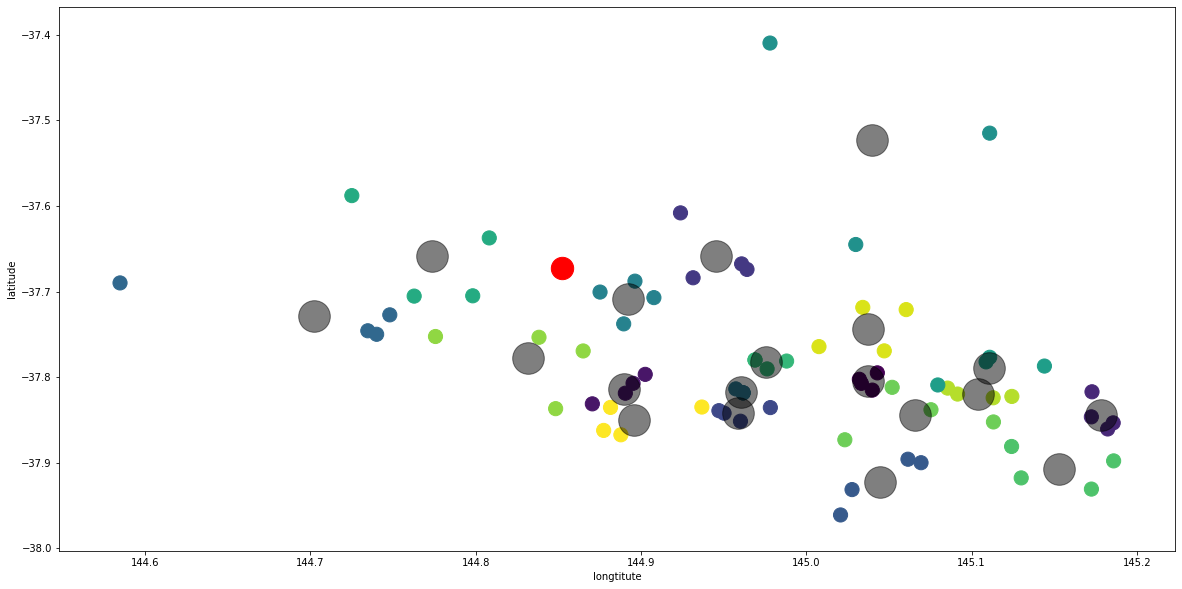

In [273]:
fig, ax = plt.subplots(figsize=(20, 10))
plt.scatter(employees_copy['longtitute'], employees_copy['latitude'],c = labels, alpha=1,s=200)
plt.scatter(centers[:, 1], centers[:, 0], c='black', s=1000, alpha=0.5);
plt.scatter(airport[1][1], airport[1][0],c = 'red', alpha=1,s=500)
plt.xlabel("longtitute")
plt.ylabel("latitude");

In [274]:
#get the distance between each address and the airport
#from math import sin, cos, sqrt, atan2, radians
# approximate radius of earth in km
#R = 6373.0
#distances = []
#for index, row in employees.iterrows():
#    distance_la = airport[1][0] - row['latitude']
#    distance_lo = airport[1][1] - row['longtitute']
#    a = sin(distance_la / 2)**2 + cos(row['latitude']) * cos(airport[1][0]) * sin(distance_lo / 2)**2
#    c = 2 * atan2(sqrt(a), sqrt(1 - a))
#    distance = R * c
#    distances.append(distance)
#employees_copy['distances'] = distances
#for each group, see which employee does each taxi starts with, then check who are the following pick-up employee


In [375]:
#get the distance between each address and the airport
from geopy.distance import geodesic
distances = []
for index, row in employees.iterrows():
    start = (row['latitude'],row['longtitute'])
    airport = (-37.6729712, 144.8519567)
    distances.append(geodesic(start,airport).kilometers)
employees_copy['distances'] = distances

In [376]:
employees_copy['order'] = 0
employees_copy

,ID,Given Name,Surname,Street,Suburb,State,Post Code,Country,latitude,longtitute,cluster_label,distances,order
0,1,Casandra,Ackerman,5 Browning St,Kingsbury,VIC,3083,Australia,-37.718462,145.034195,17,16.846724,0
1,2,Tracey,Akers,46 Coorigil Rd,Carnegie,VIC,3163,Australia,-37.895764,145.061530,5,30.859293,0
2,3,Basil,Austin,88 Military Rd,Avondale Heights,VIC,3034,Australia,-37.769334,144.865037,15,10.757462,0
3,4,Melissa,Banks,8 Medway St,Seddon,VIC,3011,Australia,-37.807108,144.895223,1,15.368679,0
4,5,Letha,Bates,37 Burnt St,Nunawading,VIC,3131,Australia,-37.817022,145.172859,2,32.489283,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,71,Angelina,Warren,19 Blenheim Ave,Mont Albert,VIC,3127,Australia,-37.824022,145.113070,16,28.471810,0
71,72,Jon,Weathernone,31 Queen St,Melbourne,VIC,3000,Australia,-37.818220,144.961779,7,18.803938,0
72,73,Maria,Weber,135A Gordon St,Balwyn,VIC,3103,Australia,-37.809051,145.079576,10,25.112270,0
73,74,Dewey,Wills,4 Daylesford Terrace,Caroline Springs,VIC,3023,Australia,-37.749859,144.740103,6,13.042237,0


In [377]:
def orderLabel(new):
    curr = []
    for i in range(len(new['distances'].index)):
        curr.append(new['distances'][new['distances'].index[i]])
    curr.sort(reverse=True)
    curr_dict = {}
    for i in range(len(new['distances'].index)):
        index = curr.index(new['distances'][new['distances'].index[i]])
        curr[index] = 0
        curr_dict[new['distances'].index[i]] = index+1
    for key,value in curr_dict.items():
        employees_copy['order'][key] = value

In [378]:
for i in range(19):
    new = employees_copy.loc[employees_copy['cluster_label'] == i]
    orderLabel(new)

In [380]:
employees_copy

,ID,Given Name,Surname,Street,Suburb,State,Post Code,Country,latitude,longtitute,cluster_label,distances,order
0,1,Casandra,Ackerman,5 Browning St,Kingsbury,VIC,3083,Australia,-37.718462,145.034195,17,16.846724,4
1,2,Tracey,Akers,46 Coorigil Rd,Carnegie,VIC,3163,Australia,-37.895764,145.061530,5,30.859293,4
2,3,Basil,Austin,88 Military Rd,Avondale Heights,VIC,3034,Australia,-37.769334,144.865037,15,10.757462,3
3,4,Melissa,Banks,8 Medway St,Seddon,VIC,3011,Australia,-37.807108,144.895223,1,15.368679,3
4,5,Letha,Bates,37 Burnt St,Nunawading,VIC,3131,Australia,-37.817022,145.172859,2,32.489283,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,71,Angelina,Warren,19 Blenheim Ave,Mont Albert,VIC,3127,Australia,-37.824022,145.113070,16,28.471810,2
71,72,Jon,Weathernone,31 Queen St,Melbourne,VIC,3000,Australia,-37.818220,144.961779,7,18.803938,2
72,73,Maria,Weber,135A Gordon St,Balwyn,VIC,3103,Australia,-37.809051,145.079576,10,25.112270,4
73,74,Dewey,Wills,4 Daylesford Terrace,Caroline Springs,VIC,3023,Australia,-37.749859,144.740103,6,13.042237,3


In [381]:
final_map = folium.Map(location=[-37.0,144], control_scale=True, zoom_start=7,attr = "Melbourne map")
icons = {1:'female',2:'male',3:'user',4:'child'}
for i in range(0,len(employees)):
    folium.Marker(
        location=[employees_copy['latitude'][i], employees_copy['longtitute'][i]],
        popup = employees_copy['Street'][i] + " *Order of picking up: " +str(employees_copy['order'][i]) ,
        tooltip=employees_copy['Given Name'][i]+" " + employees_copy['Surname'][i],
        icon=folium.Icon(color=colors[labels[i]],icon=icons[employees_copy['order'][i]], prefix='fa'),
        ).add_to(final_map)
addCenters(final_map)
addAirport(final_map)

In [382]:
def createLines(new):
    i = len(new)
    while(i>1):
        first = new.loc[new['order']==i].reset_index()
        second = new.loc[new['order']==i-1].reset_index()
        loc = [(first['latitude'][0], first['longtitute'][0]),
       (second['latitude'][0], second['longtitute'][0])]
        folium.PolyLine(loc,
                color='red',
                weight=5,
                opacity=0.8).add_to(final_map)
        i = i-1


In [383]:
for i in range(19):
    new = employees_copy.loc[employees_copy['cluster_label'] == i]
    createLines(new)

In [384]:
final_map

## Fees Comparison

In [394]:
def taxiFareCalculator(distances):
    total_fee = 4.2 #base
    perK = 1.62
    total_fee += distances*perK
    return total_fee

In [395]:
def taxiFare1(new):
    final_fee = 0
    for index,row in new.iterrows():
        final_fee+=taxiFareCalculator(row['distances'])
    return final_fee


In [398]:
def taxiFare2(new):
    final_fee = 0
    n = len(new)
    i = 1
    while(i<n):
        first = new.loc[new['order']==i].reset_index()
        second = new.loc[new['order']==i+1].reset_index()
        start_loc = (first['latitude'][0], first['longtitute'][0])
        next_loc = (second['latitude'][0], second['longtitute'][0])
        final_fee += taxiFareCalculator(geodesic(start_loc,next_loc).kilometers)
        i+=i
    first = new.loc[new['order']==n].reset_index()
    final_fee+= taxiFareCalculator(first['distances'][0])
    return final_fee

In [408]:
fee_one_passagens = []
fee_max_passagens = []
fee_difference = []
for i in range(19):
    new = employees_copy.loc[employees_copy['cluster_label'] == i]
    fee1 = taxiFare1(new)
    fee2 = taxiFare2(new)
    fee_one_passagens.append(fee1)
    fee_max_passagens.append(fee2)
    fee_difference.append(fee1-fee2)

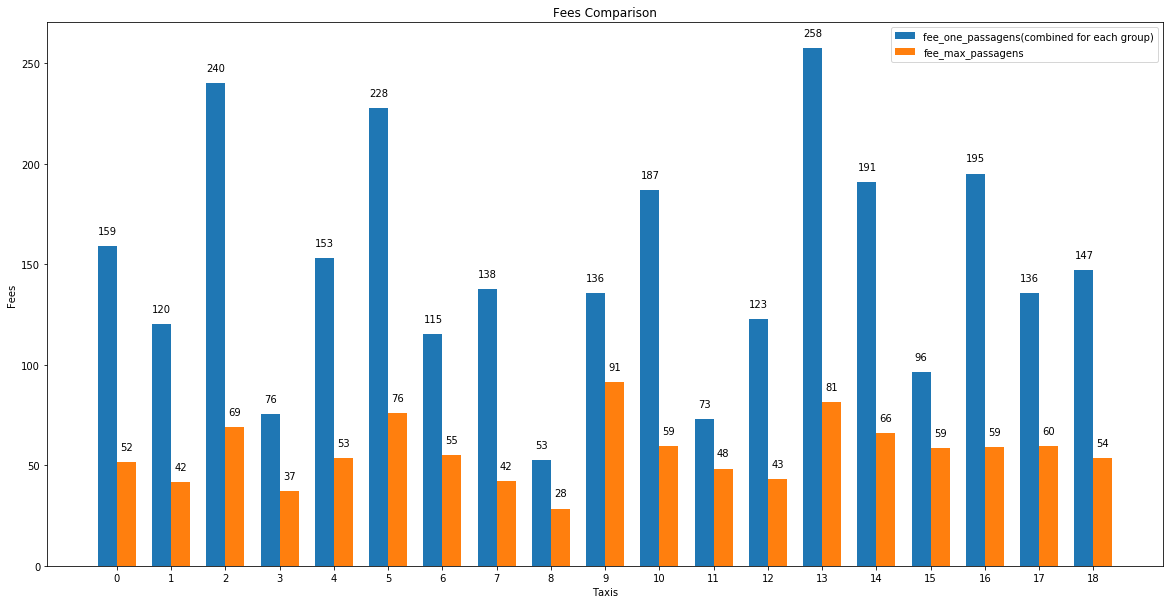

In [438]:
taxi = []
fig, ax = plt.subplots(figsize=(20, 10))
for i in range(19):
    taxi.append(str(i))
bar_width = 0.35
index = np.arange(19)
fee_one = ax.bar(index, fee_one_passagens, bar_width,
                label="fee_one_passagens(combined for each group)")
fee_max = ax.bar(index+bar_width, fee_max_passagens,
                 bar_width, label="fee_max_passagens")
ax.set_xlabel('Taxis')
ax.set_ylabel('Fees')
ax.set_title('Fees Comparison')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(taxi)
labels = [f"{round(fee_one_passagens[i])}" for i in range(len(fee_one_passagens))]
rects = fee_one.patches
rects2 = fee_max.patches
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom"
    )
label2 = [f"{round(fee_max_passagens[i])}" for i in range(len(fee_max_passagens))]
for rect, label2 in zip(rects2, label2):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height+5 , label2, ha="center", va="bottom"
    )

ax.legend()
plt.show()

In [443]:
money_saved = sum(fee_difference)
money_saved

1747.2370983447413